Clasificaci√≥n clientes riesgo crediticio

# Acerca del dataset


Contexto

Una compa√±√≠a automotriz tiene planes de ingresar a nuevos mercados con sus productos existentes (P1, P2, P3, P4 y P5). Despu√©s de una intensa investigaci√≥n de mercado, han deducido que el comportamiento del nuevo mercado es similar al de su mercado actual.

En su mercado actual, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D). Luego, realizaron un alcance y comunicaci√≥n segmentados para diferentes segmentos de clientes. Esta estrategia les ha funcionado excepcionalmente bien. Planean utilizar la misma estrategia para los nuevos mercados y han identificado 2627 nuevos clientes potenciales.

Se requiere que ayudes al gerente a predecir el grupo correcto de los nuevos clientes.

#Planteamiento de objetivos e hip√≥tesis


#Features

Variables:

- ID: ID √∫nico
- Gender: G√©nero del cliente
- Ever_Married: Estado marital del cliente
- Age: Edad del cliente
- Graduated: Si el cliente se gradu√≥ o no (Si/No)
- Profession: Profesi√≥n del cliente
- Work_Experience: Experience laboral (A√±os)
- Spending_Score: Spending score (scoring asignado en funci√≥n del comportamiento del cliente y la naturaleza del gasto) del cliente
- Family_Size: Cantidad de miembros en la familia del cliente (Incluye al cliente)
- Var_1: Categor√≠a an√≥nima del cliente
- Segmentation: Variable objetivo, segmento del cliente.

# Importaci√≥n

In [ ]:
# Importaci√≥n de datos
import os
from google.colab import files

# Creacion y modificaci√≥n dataframes
import pandas as pd
import numpy as np

# EDA
import missingno as msno

#Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Para normalizaci√≥n / preprocesamiento
!pip install category_encoders
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from category_encoders import LeaveOneOutEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler

#Modelado
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

#M√©tricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.metrics import specificity_score

#Evaluaci√≥n y tuning de modelo
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV

# Biblioteca para reutilizar el tuning del modelo
import joblib


# Warnings a saltar
import warnings
warnings.filterwarnings('ignore')


# Instalar la biblioteca de Kaggle
!pip install kaggle

#Creaci√≥n dataframe

Importamos la Key de Kaggle y el Dataset al entorno

In [ ]:
os.makedirs('/root/.kaggle/', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d kaushiksuresh147/customer-segmentation
!unzip customer-segmentation.zip -d customer-segmentation

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation
License(s): CC0-1.0
customer-segmentation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  customer-segmentation.zip
replace customer-segmentation/Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
for dirname, _, filenames in os.walk('/content/customer-segmentation'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


train = pd.read_csv('/content/customer-segmentation/Train.csv')
test = pd.read_csv('/content/customer-segmentation/Test.csv')

In [ ]:
print(train.head())
print("--------------------------------------------------------------------------------------------------")
print(test.head())

Las dos tablas tienen las mismas features

In [ ]:
df = pd.concat([train,test])
backup = df.copy() #Hacemos un df backup por si acaso.

Data frame creado, comenzamos con el EDA

#EDA Pre-Cleaning

In [75]:
df.head(10)

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   
5  461319    Male          Yes   56        No         Artist              0.0   
6  460156    Male           No   32       Yes     Healthcare              1.0   
7  464347  Female           No   33       Yes     Healthcare              1.0   
8  465015  Female          Yes   61       Yes       Engineer              0.0   
9  465176  Female          Yes   55       Yes         Artist              1.0   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  
5        Average          2.0  Cat_6            C  
6            Low          3.0  Cat_6            C  
7            Low          3.0  Cat_6            D  
8            Low          3.0  Cat_7            D  
9        Average          4.0  Cat_6            C

In [76]:
df.describe()

ID           Age  Work_Experience   Family_Size
count   10695.000000  10695.000000      9597.000000  10247.000000
mean   463468.088640     43.511828         2.619777      2.844052
std      2600.966411     16.774158         3.390790      1.536427
min    458982.000000     18.000000         0.000000      1.000000
25%    461220.500000     30.000000         0.000000      2.000000
50%    463451.000000     41.000000         1.000000      3.000000
75%    465733.500000     53.000000         4.000000      4.000000
max    467974.000000     89.000000        14.000000      9.000000

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


Parece que la mayor√≠a de columnas tienen el tipo de dato correcto, pero tienen diferente cantidad de longitudes. Probablemente tengamos muchos Nan a tratar

In [78]:
for col in df.columns:
    print(f'Valores √∫nicos de {col}:\n {df[col].unique()}\n')
    print('--'*40)

Valores √∫nicos de ID:
 [462809 462643 466315 ... 467938 467960 467968]

--------------------------------------------------------------------------------
Valores √∫nicos de Gender:
 ['Male' 'Female']

--------------------------------------------------------------------------------
Valores √∫nicos de Ever_Married:
 ['No' 'Yes' nan]

--------------------------------------------------------------------------------
Valores √∫nicos de Age:
 [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]

--------------------------------------------------------------------------------
Valores √∫nicos de Graduated:
 ['No' 'Yes' nan]

--------------------------------------------------------------------------------
Valores √∫nicos de Profession:
 ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]



La variable objetivo para estar balanceada, lo √∫nico extra√±o se puede identificar es que casi todas las features num√©ricas est√°n formateadas como floats y en verdad son ints, por comodidad podr√≠a modificarse.

A su vez, el contenido de Var_1 est√° ingresado como string, habr√° que stripear y dejar solo los n√∫meros correspondientes.

La feature 'Segmentation' es la variable que nos permitir√° medir el accuracy de nuestro modelo futuro.

In [79]:
df.duplicated().sum()


38

Existen filas duplicadas en el dataset

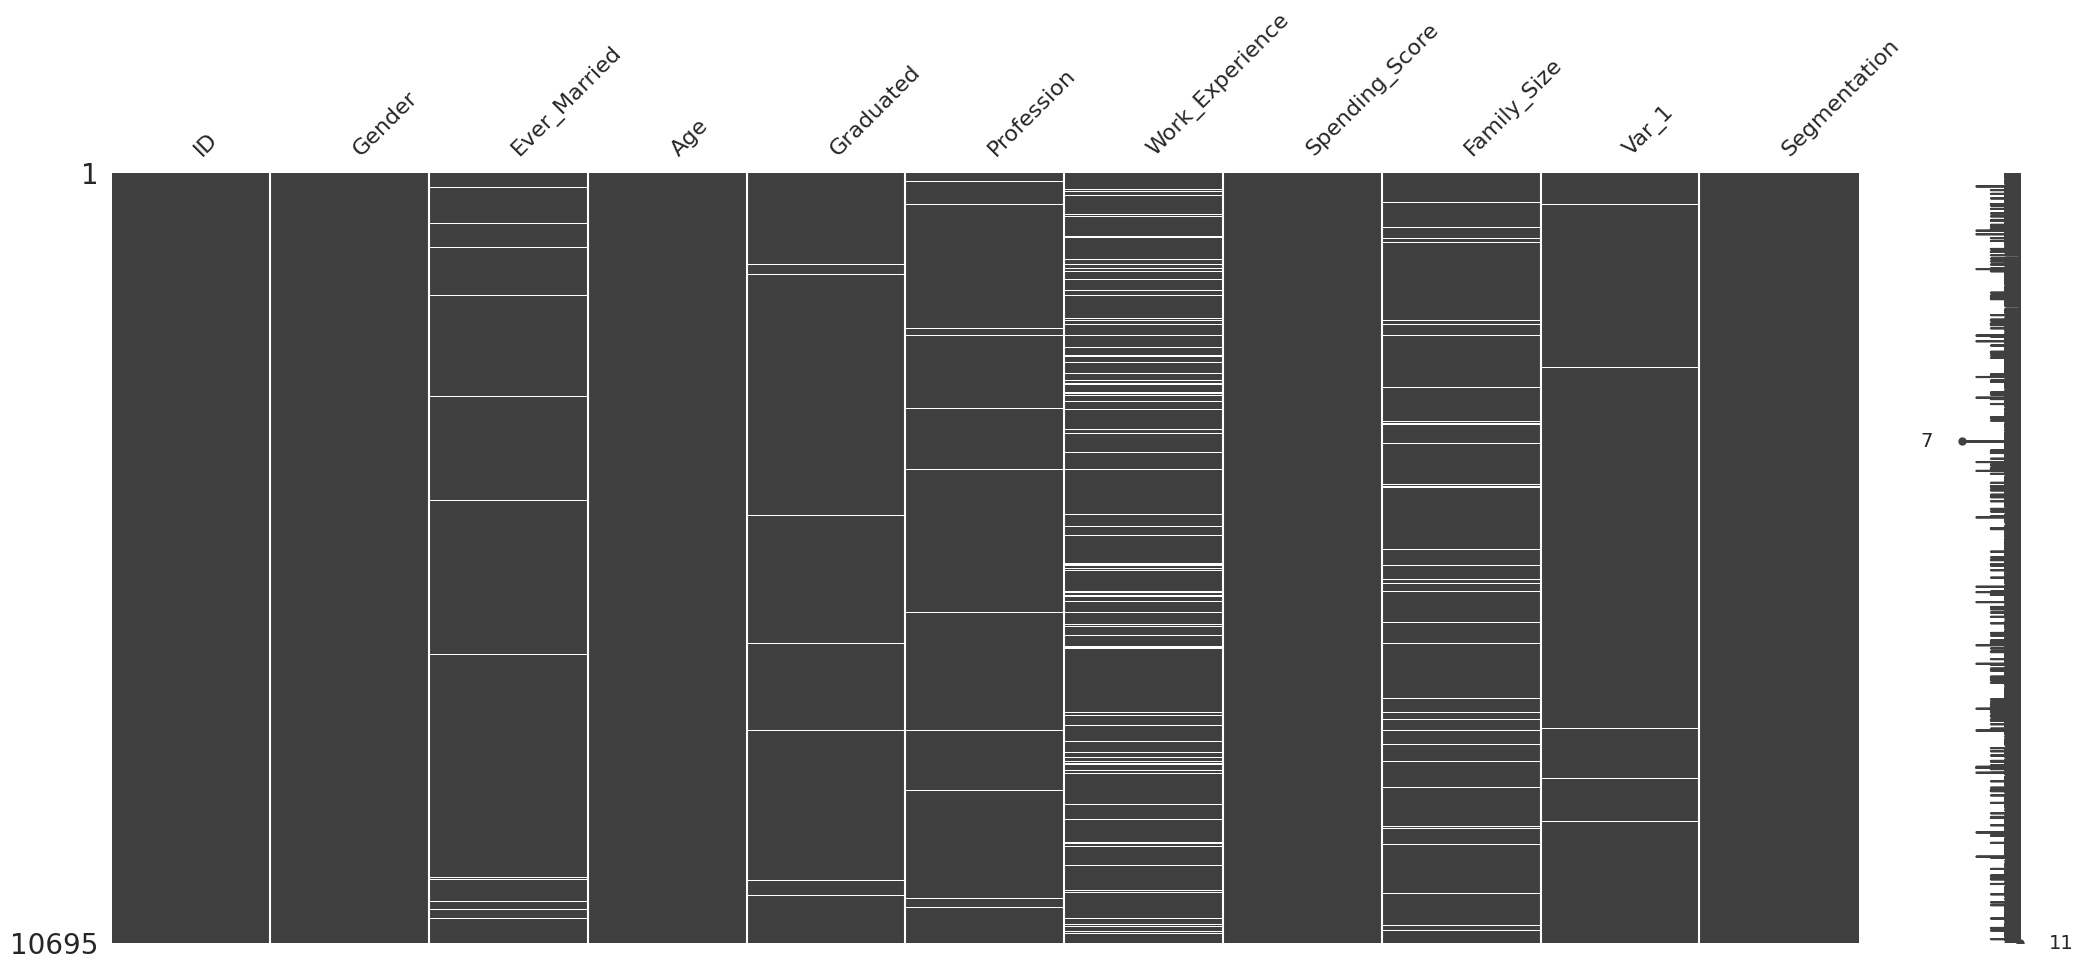

<Figure size 400x200 with 0 Axes>

In [80]:
msno.matrix(df)
plt.figure(figsize=(4, 2))
plt.show()

Podemos ver que en varias columnas hay valores nulos.
En algunas podr√≠a ser una respuesta v√°lida, tales como 'Work_Experience','Profession' o 'Graduated'. Pero en el resto de las variables me llama un poco la atenci√≥n, y podr√≠amos plantearnos reemplazar esos valores o eliminarlos.

In [ ]:
df.hist(bins=25,figsize=(15,10),color='#6940A8') #Histograma de las variables num√©ricas
plt.show()

# üßπReformateo y Limpieza

COmenzamos dropeando la columna ID ya que poseemos una por defecto y no nos proporciona info √∫til.

In [ ]:
df = (df.drop(['ID'], axis=1))
df

Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0       Male           No   22        No     Healthcare              1.0   
1     Female          Yes   38       Yes       Engineer              NaN   
2     Female          Yes   67       Yes       Engineer              1.0   
3       Male          Yes   67       Yes         Lawyer              0.0   
4     Female          Yes   40       Yes  Entertainment              NaN   
...      ...          ...  ...       ...            ...              ...   
2622    Male           No   29        No     Healthcare              9.0   
2623  Female           No   35       Yes         Doctor              1.0   
2624  Female           No   53       Yes  Entertainment              NaN   
2625    Male          Yes   47       Yes      Executive              1.0   
2626  Female           No   43       Yes     Healthcare              9.0   

     Spending_Score  Family_Size  Var_1 Segmentation  
0               Low          4.0  Cat_4            D  
1           Average          3.0  Cat_4            A  
2               Low          1.0  Cat_6            B  
3              High          2.0  Cat_6            B  
4              High          6.0  Cat_6            A  
...             ...          ...    ...          ...  
2622            Low          4.0  Cat_6            B  
2623            Low          1.0  Cat_6            A  
2624            Low          2.0  Cat_6            C  
2625           High          5.0  Cat_4            C  
2626            Low          3.0  Cat_7            A  

[10695 rows x 10 columns]

A los valores nulos de las siguientes features se les asignar√° el valor 0 o "No" para mantener una mayor cantidad de datos, por m√°s pocos que sean.

Features y elementos a tratar:
1. Intentar mantener la mayor cantidad de datos, reemplazando nulos por valores m√°s que elimin√°ndolos.
2. Dropeamos duplicados y nulos, habiendo modificado los valores nulos de features espec√≠ficas.
3. Hacer num√©rica la feature `'Var_1'`
4. Reformateo al tipo de dato correcto en columnas num√©ricas

##Manipulaci√≥n de nulos y reformateo

1.

In [81]:
df['Work_Experience'] = df['Work_Experience'].fillna(0)
df['Ever_Married'] = df['Ever_Married'].fillna("No")
df['Graduated'] = df['Graduated'].fillna("No")

2.

In [82]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

3.


In [83]:
#Eliminamos el string y hacemos la feature de tipo int
df['Var_1'] = df['Var_1'].str.replace('Cat_', '').astype(int)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9976 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9976 non-null   int64  
 1   Gender           9976 non-null   object 
 2   Ever_Married     9976 non-null   object 
 3   Age              9976 non-null   int64  
 4   Graduated        9976 non-null   object 
 5   Profession       9976 non-null   object 
 6   Work_Experience  9976 non-null   float64
 7   Spending_Score   9976 non-null   object 
 8   Family_Size      9976 non-null   float64
 9   Var_1            9976 non-null   int64  
 10  Segmentation     9976 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 935.2+ KB


4.

In [85]:
# Formateamos correctamente las features
df['Work_Experience'] = df['Work_Experience'].astype(int)
df['Family_Size'] = df['Family_Size'].astype(int)

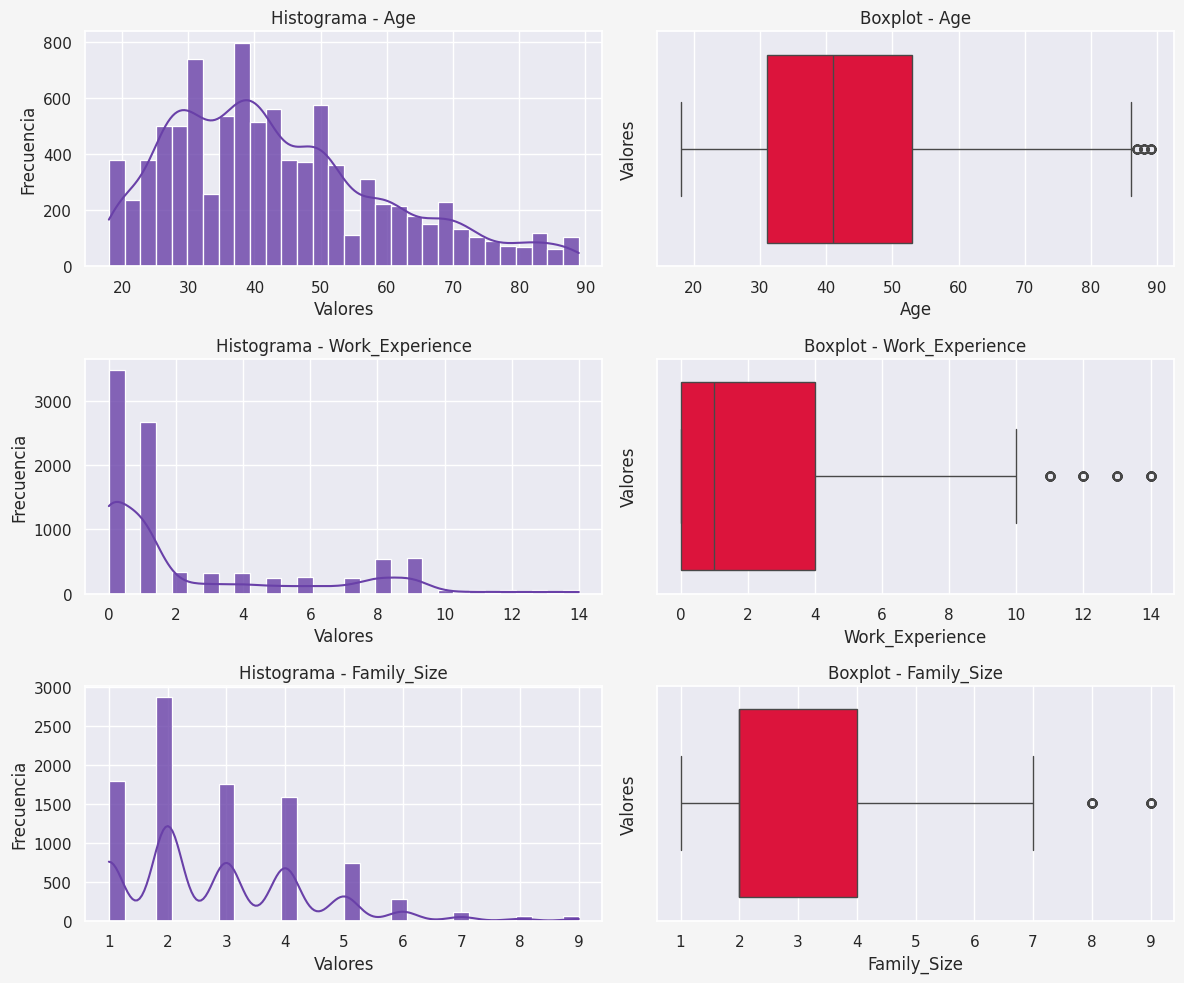

In [ ]:
columnas_seleccionadas = ['Age', 'Work_Experience','Family_Size']

# Prepara una grilla de subplots con un gris claro
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10), facecolor='whitesmoke')
sns.set_theme(style='darkgrid')
# Itera a trav√©s de las columnas seleccionadas y hace histogramas y boxplots
for i, columna in enumerate(columnas_seleccionadas): #Enumerate permite iterar en una lista, returneando una tupla que contiene el √≠ndice de cada elemento y el elemento mismo.
    # Histograma
    sns.histplot(df[columna], bins=30, color='#6940A8', alpha=0.8, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma - {columna}')
    axes[i, 0].set_xlabel('Valores')
    axes[i, 0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(x=df[columna], ax=axes[i, 1], color='crimson', boxprops=dict(facecolor='crimson'))
    axes[i, 1].set_title(f'Boxplot - {columna}')
    axes[i, 1].set_ylabel('Valores')

# Ajuste de espacio
plt.tight_layout()

# Muestra el gr√°fico
plt.show()

In [ ]:
df

Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0       Male           No   22        No     Healthcare                1   
1     Female          Yes   38       Yes       Engineer                0   
2     Female          Yes   67       Yes       Engineer                1   
3       Male          Yes   67       Yes         Lawyer                0   
4     Female          Yes   40       Yes  Entertainment                0   
...      ...          ...  ...       ...            ...              ...   
2621  Female           No   35       Yes  Entertainment                1   
2622    Male           No   29        No     Healthcare                9   
2623  Female           No   35       Yes         Doctor                1   
2624  Female           No   53       Yes  Entertainment                0   
2626  Female           No   43       Yes     Healthcare                9   

     Spending_Score  Family_Size  Var_1 Segmentation  
0               Low            4      4            D  
1           Average            3      4            A  
2               Low            1      6            B  
3              High            2      6            B  
4              High            6      6            A  
...             ...          ...    ...          ...  
2621            Low            2      6            D  
2622            Low            4      6            B  
2623            Low            1      6            A  
2624            Low            2      6            C  
2626            Low            3      7            A  

[9264 rows x 10 columns]

In [ ]:
count_A = df['Segmentation'].value_counts().get("A", 0)
count_B = df['Segmentation'].value_counts().get("B", 0)
count_C = df['Segmentation'].value_counts().get("C", 0)
count_D = df['Segmentation'].value_counts().get("D", 0)
print(f'A: {count_A}')
print(f'B: {count_B}')
print(f'C: {count_C}')
print(f'D: {count_D}')

A: 2505
B: 2196
C: 2103
D: 2460


##IQR - Limpieza Outliers

In [ ]:
# Utilizamos las mismas columnas seleccionadas anteriormente
columnas_seleccionadas = ['Age', 'Work_Experience', 'Family_Size']
suma = 0

# Diccionario para contar los outliers
outliers = {}

def conteo_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definiendo el l√≠mite de los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Encontrar y contar los outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    contar_outliers = outliers.shape[0]
    return contar_outliers


# Iteraci√≥n de la funci√≥n en cada columna y almacenamiento de los resultados
for columna in columnas_seleccionadas:
    contar_outliers = conteo_outliers(df, columna)
    outliers[columna] = contar_outliers

# Impresi√≥n de los resultados
print("Cantidad de Outliers:")
for columna, cant in outliers.items():
    suma += cant # Variable para aclaraci√≥n de lo eliminado
    print(f"{columna}: {cant}")

# Imprimir la suma total de outliers eliminados
print(f"Total de outliers encontrados: {suma}")

Cantidad de Outliers:
Age: 105
Work_Experience: 232
Family_Size: 123
Total de outliers encontrados: 460


In [ ]:
# Impresi√≥n de resultados luego de eliminar outliers
print(f"Filas totales: {df.shape[0]}")
print(f"Se encontraron {suma} outliers en un total de {df.shape[0]} valores.")
print(f"Eso que representa un {suma / df.shape[0] * 100:.1f}% del df original.")

Filas totales: 9264
Se encontraron 460 outliers en un total de 9264 valores.
Eso que representa un 5.0% del df original.


Se eligi√≥ eliminar los outliers ya que se hicieron pruebas y estos le restaban a la precisi√≥n del modelo final.

In [ ]:
count_A = df['Segmentation'].value_counts().get("A", 0)
count_B = df['Segmentation'].value_counts().get("B", 0)
count_C = df['Segmentation'].value_counts().get("C", 0)
count_D = df['Segmentation'].value_counts().get("D", 0)
print(f'A: {count_A}')
print(f'B: {count_B}')
print(f'C: {count_C}')
print(f'D: {count_D}')

A: 2505
B: 2196
C: 2103
D: 2460


A: 2505
B: 2196
C: 2103
D: 2460

La eliminaci√≥n de los outliers no present√≥ una gran diferencia respecto a los gr√°ficos.

Se decidi√≥ no eliminar los outliers ya que no era beneficioso para el modelo.

#EDA Post-Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9264 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           9264 non-null   object
 1   Ever_Married     9264 non-null   object
 2   Age              9264 non-null   int64 
 3   Graduated        9264 non-null   object
 4   Profession       9264 non-null   object
 5   Work_Experience  9264 non-null   int64 
 6   Spending_Score   9264 non-null   object
 7   Family_Size      9264 non-null   int64 
 8   Var_1            9264 non-null   int64 
 9   Segmentation     9264 non-null   object
dtypes: int64(4), object(6)
memory usage: 796.1+ KB


Graficamos las columnas categ√≥ricas

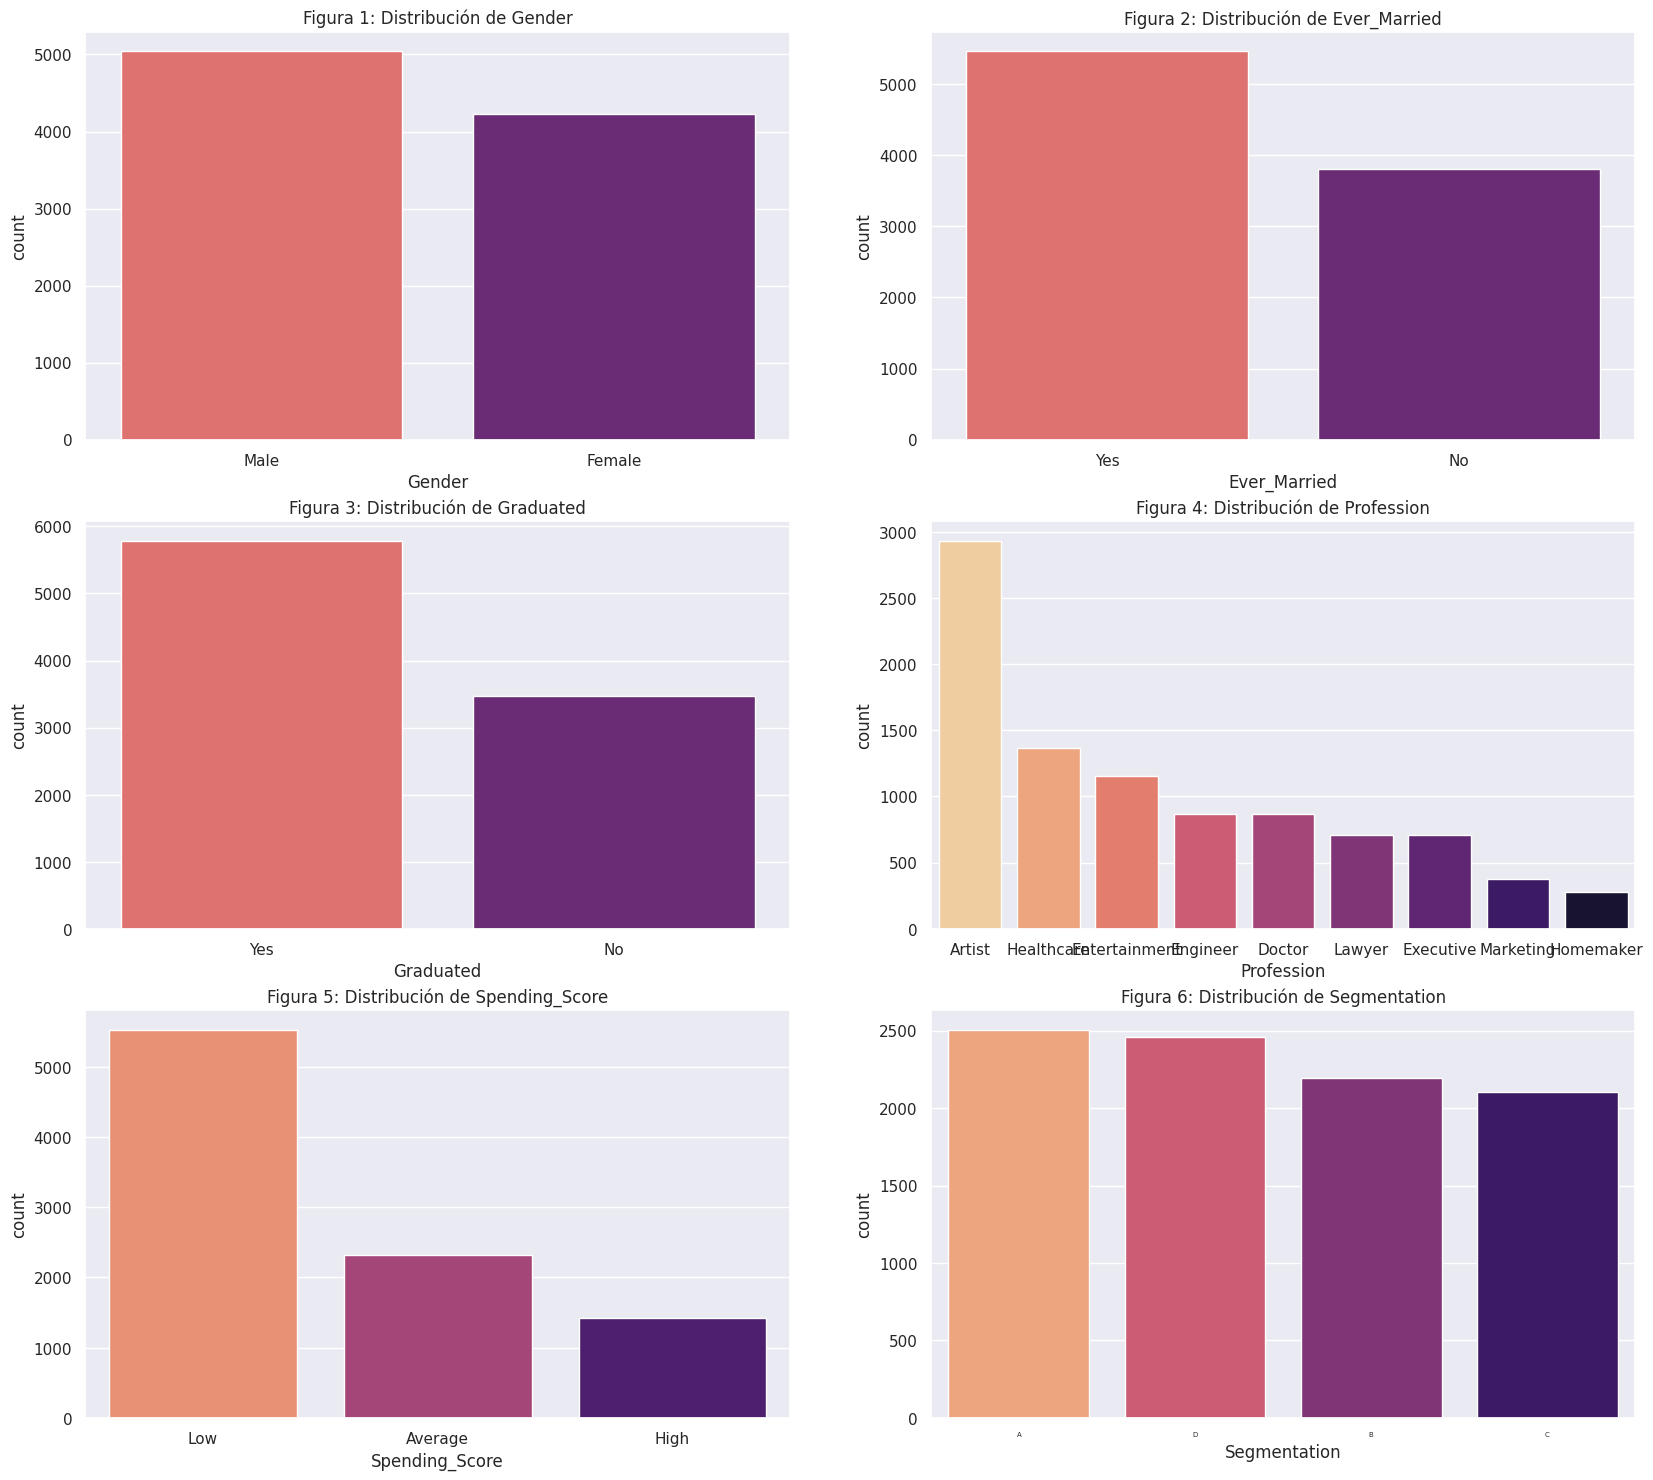

In [ ]:
variables = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Segmentation']

# Creaci√≥n de grilla subplot 3x2
fig, ejes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))

# Flattenear los ejes para simplificar la visualizaci√≥n
ejes = ejes.flatten()

# Iteraci√≥n sobre cada caracter√≠stica y crear un gr√°fico
for i, variable in enumerate(variables):
    #Ordenamos de forma descendente los valores para facilitar la visualizaci√≥n
    ordenar = df[variable].value_counts().index

    #Graficamos
    sns.countplot(df, x=variable, order=ordenar, ax=ejes[i],palette='magma_r')

    #leyenda
    ejes[i].set_title(f'Figura {i+1}: Distribuci√≥n de {variable}')

    # Achicamos los nombres para correcta visualizacion
    plt.tick_params(axis='x', labelsize= 5)



In [ ]:
for feature in ['Age', 'Work_Experience', 'Family_Size','Var_1']:
    plot_numerical(feature)


NameError: name 'plot_numerical' is not defined

Graficamos las columnas num√©ricas

-----------------------------------
COLUMNAS NUM√âRICAS
-----------------------------------


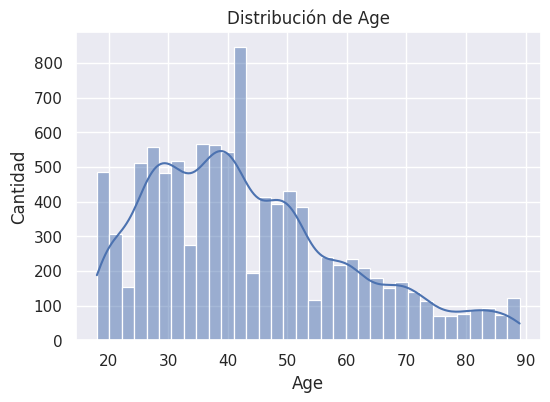

¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞


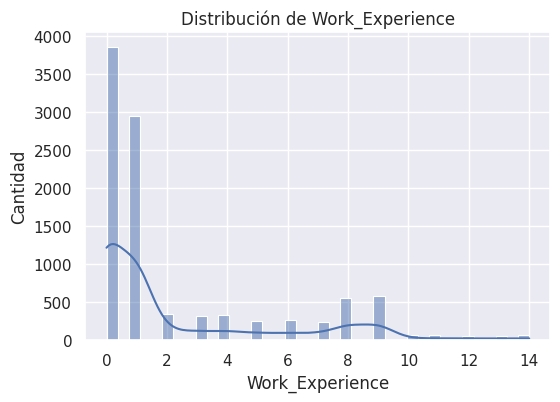

¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞


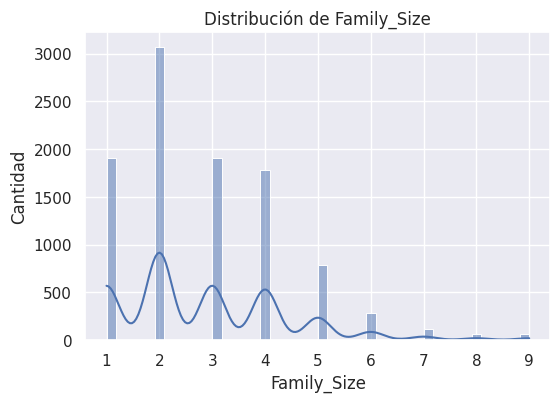

¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞


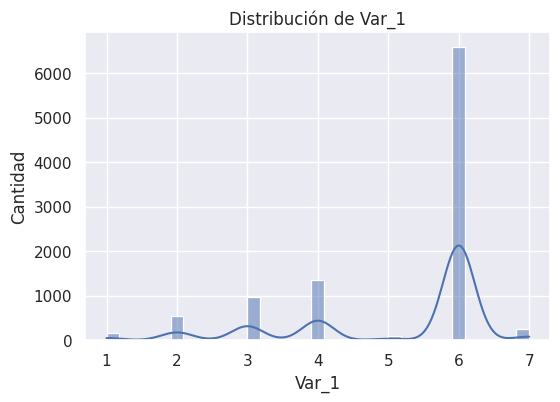

¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞


In [86]:
# Graficar las caracter√≠sticas num√©ricas por separado
num_features = ['Age', 'Work_Experience', 'Family_Size','Var_1']

print("-----------------------------------")
print("COLUMNAS NUM√âRICAS")
print("-----------------------------------")
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribuci√≥n de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cantidad')
    plt.show()
    print("¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞") #Para separar los gr√°ficos

#Feature Engineering

##Encoding

In [87]:
#Separamos las categor√≠as cualitativas de las cuantitativas
categoricos = df.select_dtypes(include=object)
numericos = df.select_dtypes(exclude=object)

In [88]:
#Reemplazamos todas las variables categoricas por valores num√©ricos enteros
#Aplicamos label encoder a cada columna categ√≥rica
for i in range(0, categoricos.shape[1]):
  categoricos[categoricos.columns[i]] = lab.fit_transform(categoricos.iloc[:, i])

scaler = StandardScaler()
#Hacemos una copia para por si se quiere usar la variable n√∫mericos en un futuro
numericos_escalados = numericos.copy()


#Escalamos los valores num√©ricos
numericos_escalados[numericos.columns] = scaler.fit_transform(numericos)
numericos = numericos_escalados[numericos.columns]

In [89]:
#Concatenamos las filas para tener nuestro df completamente num√©rico
dfLE = pd.concat([numericos,categoricos],axis=1)
#dfLE = df + "Label Encoder"
dfLE

ID       Age  Work_Experience  Family_Size     Var_1  Gender  \
0    -0.259762 -1.290147        -0.412178     0.751366 -0.815363       1   
1    -0.323871 -0.333032        -0.713835     0.100591 -0.815363       0   
2     1.094253  1.401739        -0.412178    -1.200959  0.598519       0   
3    -0.674540  1.401739        -0.713835    -0.550184  0.598519       1   
4    -0.313830 -0.213393        -0.713835     2.052915  0.598519       0   
...        ...       ...              ...          ...       ...     ...   
2622  1.727234 -0.871409         2.001080     0.751366  0.598519       1   
2623  1.728779 -0.512491        -0.412178    -1.200959  0.598519       0   
2624  1.729551  0.564264        -0.713835    -0.550184  0.598519       0   
2625  1.729937  0.205345        -0.412178     1.402140 -0.815363       1   
2626  1.732641 -0.033933         2.001080     0.100591  1.305460       0   

      Ever_Married  Graduated  Profession  Spending_Score  Segmentation  
0                0          0           5               2             3  
1                1          1           2               0             0  
2                1          1           2               2             1  
3                1          1           7               1             1  
4                1          1           3               1             0  
...            ...        ...         ...             ...           ...  
2622             0          0           5               2             1  
2623             0          1           1               2             0  
2624             0          1           3               2             2  
2625             1          1           4               1             2  
2626             0          1           5               2             0  

[9976 rows x 11 columns]

Por lo tanto, a partir de ahora en la variable segmentaci√≥n:
- A = 0
- B = 1
- C = 2
- D = 3

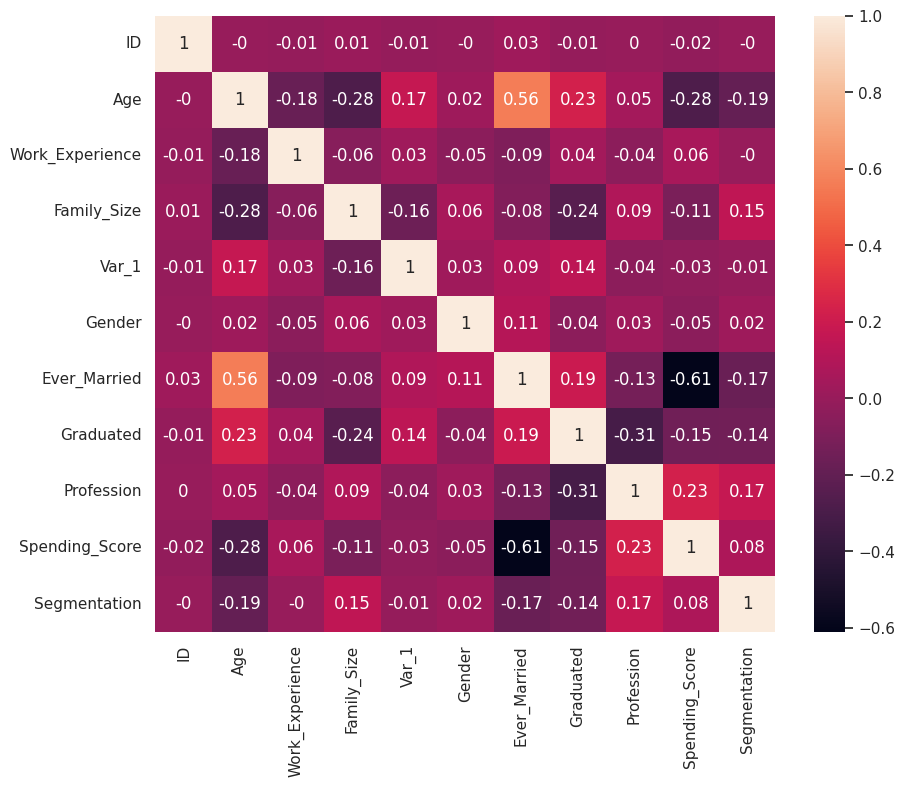

In [90]:
# Separamos las columnas num√©ricas del resto
columnas_numericas = dfLE.select_dtypes(exclude=['object', 'category'])

#Hacemos matriz de corr solo con columnas num√©ricas
matriz_corr = columnas_numericas.corr().round(2)

plt.figure(figsize=(10, 8))

sns.heatmap(matriz_corr, annot=True)
plt.show()

#Modelado 1

Ya habiendo encodeado todas las variables, voy a dividir el dataframe en 2 partes.
1. Separo mis variables para predecir (x) de mi variable objetivo (y)
2. Separo los dataframes x e y en training y test.

Las columnas innecesarias ya fueron dropeadas en la parte de limpieza.

Variable Objetivo: `'Segmentation'`

In [91]:
y = dfLE['Segmentation']
x = dfLE.drop(['Segmentation'],axis = 1)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [93]:
from sklearn.metrics import f1_score

def modelado(modelo, x_train, x_test, y_train, y_test):
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')  # Cambiado de especificidad a f1-score

    return accuracy, precision, recall, f1


3. Recall (Sensibilidad o Tasa de Verdaderos Positivos)
El recall es la proporci√≥n de verdaderos positivos sobre el total de instancias reales positivas. Mide cu√°ntas de las instancias realmente positivas fueron predichas correctamente.

Ejemplo: Si un modelo identifica correctamente 40 de 50 instancias positivas, el recall es 80%.

In [94]:
modelos = {
    'DecisionTreeC': DecisionTreeClassifier(),
    'GradientBoostingC': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestC': RandomForestClassifier(n_estimators=100),
    'LGBC': lgb.LGBMClassifier(random_state=42,),
    'XGBC': xgb.XGBClassifier(n_estimators=100, seed=27)
}

Ahora vamos a modularizar una funci√≥n llamada Resultados_Algoritmo.

Esta funci√≥n nos dar√° un resultado impreso de los accuracies de cada modelo. Lo √∫nico que cambiar√≠a, raz√≥n por la que la modularizamos, es el input de los train y los test. Esto se hace para calcular f√°cilmente los accuracies de diferentes grupos de datos con los mimos modelos.

In [95]:
def Evaluacion_Algoritmos(modelos, x_train, x_test, y_train, y_test):
  # Diccionario para almacenar los resultados del entrenamiento
  resultados = {'Algoritmo': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

  for nombre, modelo in modelos.items():
      # Utilizamos la funci√≥n modelado para obtener m√©tricas
      accuracy, precision, recall, f1 = modelado(modelo, x_train, x_test, y_train, y_test)

      # Convertimos las m√©tricas a porcentaje y luego a cadena
      accuracy_str = f"{accuracy * 100:.2f}%"
      precision_str = f"{precision * 100:.2f}%"
      recall_str = f"{recall * 100:.2f}%"
      f1_str = f"{f1 * 100:.2f}%"

      # Apendeamos los valores al diccionario de resultados
      resultados['Algoritmo'].append(nombre)
      resultados['Accuracy'].append(accuracy_str)
      resultados['Precision'].append(precision_str)
      resultados['Recall'].append(recall_str)
      resultados['F1-Score'].append(f1_str)
  # Returneamos los resultados
  return resultados


In [96]:
df_resultados = Evaluacion_Algoritmos(modelos, x_train, x_test, y_train, y_test)
# Convertimos los resultados a un DataFrame ordenado para visualizaci√≥n
pd.DataFrame(df_resultados).sort_values(by='Accuracy',ascending=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 7980, number of used features: 10
[LightGBM] [Info] Start training from score -1.337862
[LightGBM] [Info] Start training from score -1.482507
[LightGBM] [Info] Start training from score -1.455287
[LightGBM] [Info] Start training from score -1.283041


Algoritmo Accuracy Precision  Recall F1-Score
1    GradientBoostingC   47.09%    46.22%  47.09%   46.25%
5                 LGBC   46.84%    46.24%  46.84%   46.37%
3   LogisticRegression   45.29%    44.49%  45.29%   42.48%
6                 XGBC   44.79%    44.41%  44.79%   44.49%
2  K-Nearest Neighbors   42.64%    43.20%  42.64%   42.68%
4        RandomForestC   41.53%    41.16%  41.53%   41.21%
0        DecisionTreeC   36.82%    36.92%  36.82%   36.87%

Se puede ver que el algoritmo con mayores m√©tricas en los 4 apartados fue GradientBoostingC, por lo tanto, en primera instancia utilizaremos ese para la clasificaci√≥n

##Balanceo de variables

Realizamos el balanceo luego de encodear ya que se precisan valores num√©ricos para realizar este procedimiento.

### UnderSampler

In [97]:
print("Distribuci√≥n de clases antes del balanceo:", Counter(y_train))

undersampler = RandomUnderSampler(random_state=42)

for nombre, modelo in modelos.items():
  x_train_unders, y_train_unders = undersampler.fit_resample(x_train, y_train)


print("Distribuci√≥n de clases despu√©s del balanceo:", Counter(y_train_unders))

Distribuci√≥n de clases antes del balanceo: Counter({3: 2212, 0: 2094, 2: 1862, 1: 1812})
Distribuci√≥n de clases despu√©s del balanceo: Counter({0: 1812, 1: 1812, 2: 1812, 3: 1812})


In [98]:
x_train = x_train_unders
y_train = y_train_unders

#Utilizamos la misma funci√≥n con los trains balanceados y mismos test.
df_resultados = Evaluacion_Algoritmos(modelos, x_train, x_test, y_train, y_test)


# Convertimos los resultados a un DataFrame ordenado para visualizaci√≥n
pd.DataFrame(df_resultados).sort_values(by='Accuracy',ascending=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 7248, number of used features: 10
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


Algoritmo Accuracy Precision  Recall F1-Score
1    GradientBoostingC   46.44%    45.81%  46.44%   46.04%
3   LogisticRegression   45.74%    44.52%  45.74%   44.34%
5                 LGBC   45.34%    44.92%  45.34%   45.10%
6                 XGBC   44.99%    44.68%  44.99%   44.81%
2  K-Nearest Neighbors   42.84%    43.74%  42.84%   43.12%
4        RandomForestC   42.69%    42.47%  42.69%   42.56%
0        DecisionTreeC   36.32%    36.52%  36.32%   36.41%

## Importancia de variables

Se usar√° el mejor modelo para trainear los udatos y se emplear√° el modelo fitteado para hacer predicciones con y_test.

In [99]:
# Traineamos el modelo con  GradientBoostingC
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
accuracy_score = GBC.score(x_test, y_test)
y_pred = GBC.predict(x_test)


In [ ]:
importancia = pd.Series(data=GBC.feature_importances_, index=x.columns).sort_values(ascending=False)

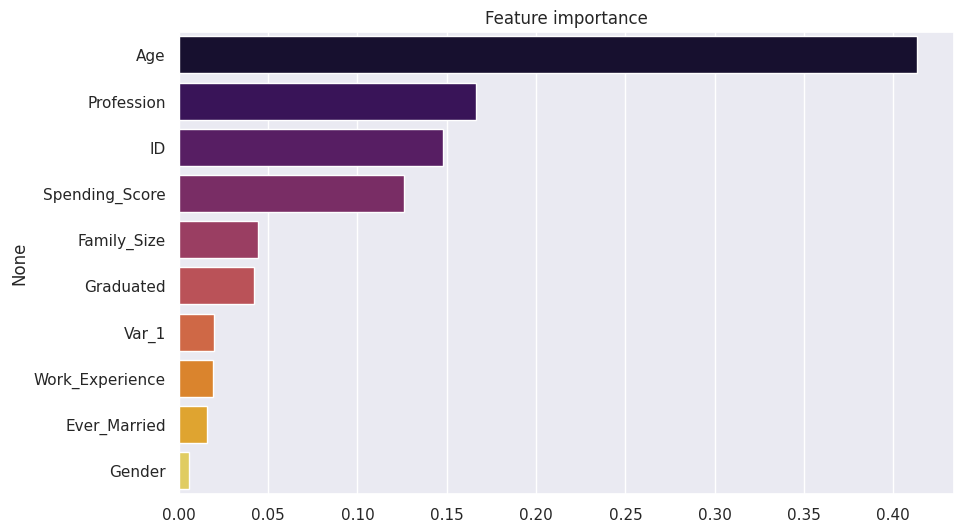

In [101]:
plt.figure(figsize=(10,6))
plt.title("Feature importance")
ax = sns.barplot(y=importancia.index, x=importancia.values, orient='h', palette='inferno')

Las variables m√°s improtantes son `'Profession'`,`'Age'`, `'Spending_Score'`, `'Family_Size'`, `'Work_Experience'`, `'Var_1'`.

Si recordamos la matriz de correlaci√≥n, `'Age'`,`'Work_Experience'`y `'Var_1'`ten√≠an una correlaci√≥n de 1. Por lo tanto, ya tiene m√°s sentido deshacernos de alguna de las variables para simplificar el modelo y tal vez el accuracy mejore.

## Evaluaci√≥n del modelo

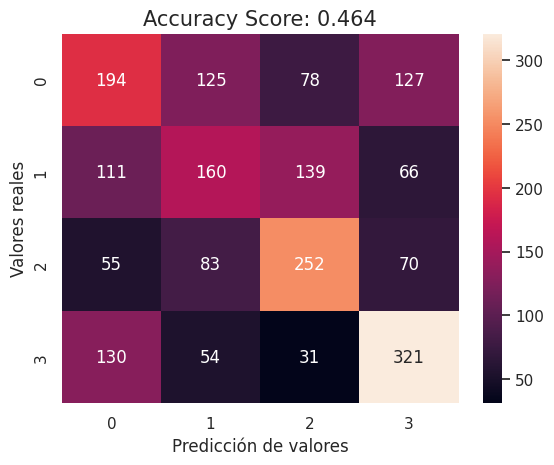

In [102]:

# Utilizamos las m√©tricas obtenidas para imprimirlo junto con la matriz
score = round(accuracy_score, 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicci√≥n de valores')
plt.ylabel('Valores reales')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

In [103]:
err

NameError: name 'err' is not defined

#EJECUTAR EL TUNING AC√Å DESPU√âS PARA VER QUE ONDA


#Selecci√≥n de caracter√≠sticas


Por nuestro estudio anterior sabemos que las variables m√°s improtantes son:

In [ ]:
importancia.head(5)

¬øQu√© le ocurrir√° a nuestras predicciones si les quitamos las variables con mayor correlatividad?



Probemos dejar de lado 'Age' y 'Work_Experience', variables que tenian  mucha correlatividad entre s√≠, y utilicemos solo las 3 m√°s importantes que nos quedan.

In [ ]:
x_train = x_train[['Profession', 'Var_1', 'Spending_Score','Age']]
x_test = x_test[['Profession', 'Var_1', 'Spending_Score','Age']]

Ahora que ya sabes qu√© modelo vamos a utilizar (GBC), no hace falta hacer el diccionario para ver el reporte de resultados.

Vamos a fitear el modelo directamente con GBC


In [ ]:

modelo = GBC

# Definimos el m√©todo de evaluaci√≥n
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Definimos la grilla
grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50,100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Configuramos GridSearchCV
search = GridSearchCV(estimator=modelo, param_grid=grid, cv=cv, scoring='accuracy',n_jobs=-1)

# Ajustamos el modelo con los datos de entrenamiento
resultado = search.fit(x_train, y_train)

# Mostramos los mejores par√°metros encontrados
print(f"Mejores par√°metros encontrados: {resultado.best_params_}")

# Evaluamos el mejor modelo
mejor_modelo = resultado.best_estimator_
accuracy = mejor_modelo.score(x_test, y_test)
print(f"Accuracy del mejor modelo: {accuracy:.2f}")

In [ ]:
# Definimos el modelo
modelo = GradientBoostingClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)

# Fit search to new training data
resultado = modelo.fit(x_train, y_train)

# Iniciamos y traineamos el modelo
score = resultado.score(x_test, y_test)
y_pred = resultado.predict(x_test)

# Calculamos y graficamos la matriz de confusi√≥n
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

En t√©rminos de recursos, es algo muy √∫til saber que con solo 3 variables el modelo funciona tiene un accuracy de 0,002 menos que con TODAS las variables.

#Tuning del Modelo



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Las clases se encuentran en formato entero, y tenemos 4 clases
# Utilizamos el n_classes por adaptabilidad, pero podr√≠a ser = 4 tambi√©n
n_classes = len(set(y_test))

# Binarizamos las etiquetas para calcular la curva ROC POR CLASE
y_test_binarizado = label_binarize(y_test, classes=range(n_classes))
y_pred_proba = mejor_modelo.predict_proba(x_test)

# Calculamos la curva ROC y el AUC para cada clase
fpr = dict() # Falsos positivos
tpr = dict() # Verdaderos positivos
roc_auc = dict() # AUC

for i in range(n_classes): #Por cada clase...
    fpr[i], tpr[i], _ = roc_curve(y_test_binarizado[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarizado[:, i], y_pred_proba[:, i])

# Gr√°fica de las curvas ROC para cada clase
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--') #Diagonal en el medio
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

Conclusiones en base al gr√°fico:

Clase 3 (AUC = 0.79):

El modelo tiene la mejor capacidad para distinguir la Clase 3 de las otras clases, con un AUC de 0.79. Esto indica un buen rendimiento, aunque no perfecto.
Clase 2 (AUC = 0.74):

El modelo tambi√©n tiene un buen rendimiento para la Clase 2, con un AUC de 0.75. Esto sugiere que el modelo es razonablemente bueno para clasificar esta clase.
Clase 1 (AUC = 0.68) y Clase 0 (AUC = 0.66):

El rendimiento del modelo para las Clases 1 y 0 es menor en comparaci√≥n con las otras clases, con un AUC de 0.68 y 0.66, respectivamente. Estos valores indican que el modelo tiene una capacidad moderada para distinguir estas clases de las dem√°s.

Significado de AUC
- AUC = 1: Clasificaci√≥n perfecta. El modelo clasifica todas las muestras correctamente.
- 0.7 < AUC < 0.9: Buen rendimiento. El modelo es bastante bueno para distinguir entre las clases.
- 0.6 < AUC < 0.7: Rendimiento aceptable. El modelo tiene una capacidad limitada para distinguir entre las clases.

# Deployment del modelo

In [ ]:

# age_input = float(input("Enter the client¬¥s age: "))
# fam_input = int(input("Enter the client¬¥s family size: "))
# prof_hc_input = str(input("Is the client¬¥s profession Healthcare (Yes/No)? "))
# if prof_hc_input == "Yes":
#     prof_hc_input = 1
# else:
#     prof_hc_input = 0
# prof_e_input = str(input("Is the client¬¥s profession Entertainment (Yes/No)? "))
# if prof_e_input == "Yes":
#     prof_e_input = 1
# else:
#     prof_e_input = 0
# prof_a_input = str(input("Is the client¬¥s profession Artist (Yes/No)? "))
# if prof_a_input == "Yes":
#     prof_a_input = 1
# else:
#     prof_a_input = 0
# married_input = str(input("Has the client ever married (Yes/No)? "))
# if married_input == "Yes":
#     married_input = 1
# else:
#     married_input = 0
# grad_n_input = str(input("Is the client graduated (Yes/No)? "))
# if grad_n_input == "Yes":
#     grad_n_input = 0
# else:
#     grad_n_input = 1
# spend_input = int(input("Enter the client¬¥s score level: "))

#Defining Xs
# X_mod_dep = pd.DataFrame({"Age":[age_input], "Family_Size":[fam_input], "Profession_Healthcare":[prof_hc_input],
#                           "Profession_Entertainment":[prof_e_input], "Profession_Artist":[prof_a_input],
#                           "Ever_Married_Yes":[married_input], "Graduated_No":[grad_n_input], "Spending_Score_Level":[spend_input]})

#Choosing an specific client for testing:
X_mod_dep = pd.DataFrame({"Age":[79], "Family_Size":[1], "Profession_Healthcare":[0],
                          "Profession_Entertainment":[0], "Profession_Artist":[1],
                          "Ever_Married_Yes":[1], "Graduated_No":[0], "Spending_Score_Level":[3]})

#Appending X_mod_dep to original X dataframe, so we can scale it all together next

X_with_X_mode_dep = X.append(X_mod_dep)
X_with_X_mode_dep = X_with_X_mode_dep.reset_index(drop=True)

#Scaling all features

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_scaled = sc_X.fit_transform(X_with_X_mode_dep)
X_scaled = pd.DataFrame(X_scaled)

#Recovering X_mod_dep row in dataframe after scaling

X_mod_dep = X_scaled.tail(1)

#Predicting results

prediction = model_xgbc.predict(X_mod_dep)
if prediction == 1:
    prediction_answer = "A"
if prediction == 2:
    prediction_answer = "B"
if prediction == 3:
    prediction_answer = "C"
if prediction == 4:
    prediction_answer = "D"

print("")
print(f"This client¬¥s predicted Segmentation is: {prediction_answer}.")

- ---------------------------


Referencias y bibliograf√≠a:

[The power of independent component analysis ica on real world applications egg example](https://towardsdatascience.com/the-power-of-independent-component-analysis-ica-on-real-world-applications-egg-example-48df336a1bd8)